# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [3]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [4]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [5]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Descriptive Statistics

In [6]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [8]:
#Set ID as Index Column
data.set_index('ID',inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


 Missing Values

In [10]:
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:\n\n", null_count_col, "\n")

Null Count for Columns:

 0    11
dtype: int64 



In [11]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")

Null Count for Rows:

 0    3999
dtype: int64 



Duplicated Values

In [12]:
data.duplicated().sum()

1

In [13]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [14]:
# Treat the duplicate value
data=data.drop(data.index[[3899]],axis=0).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award              3998 non-null   int64
dtypes: int64(11)
memory usage: 343.7 KB


 Exploratory Data Analysis

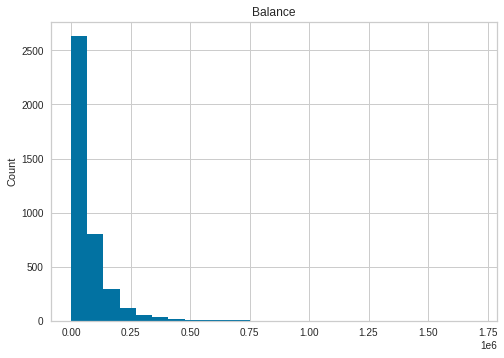

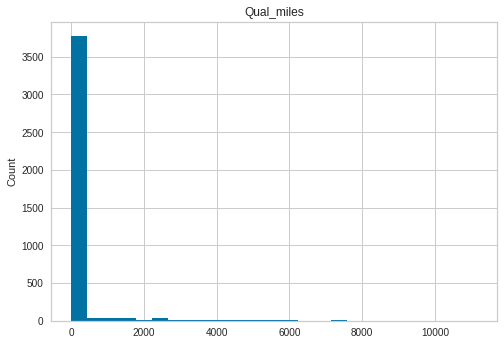

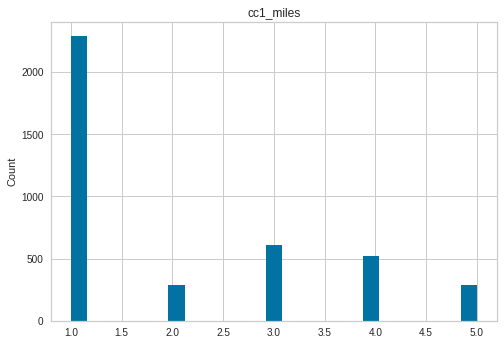

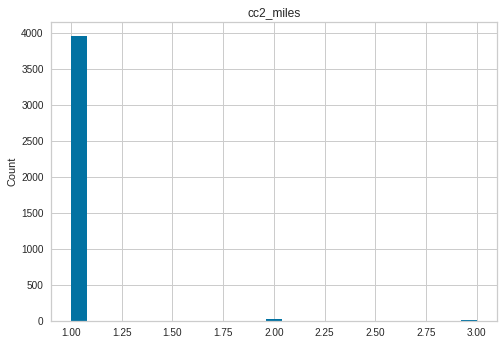

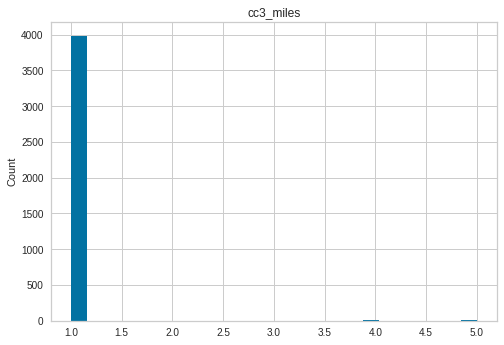

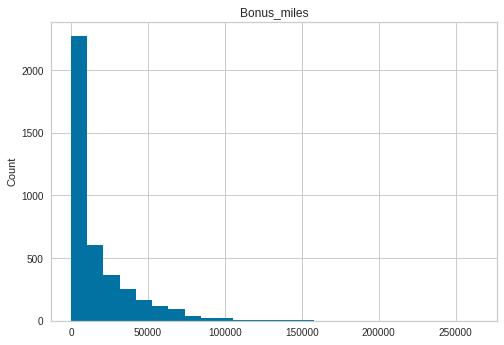

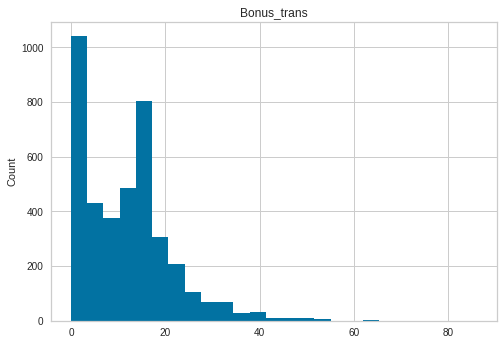

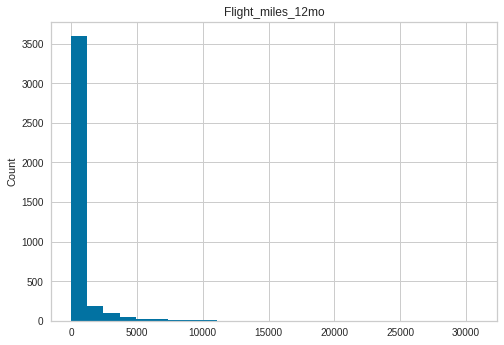

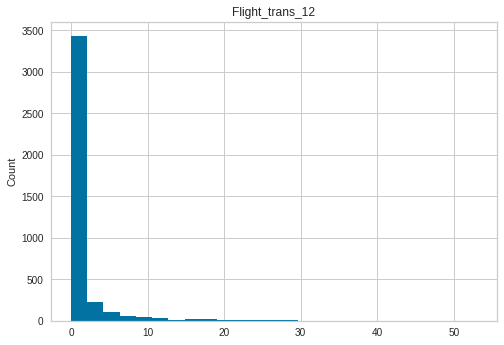

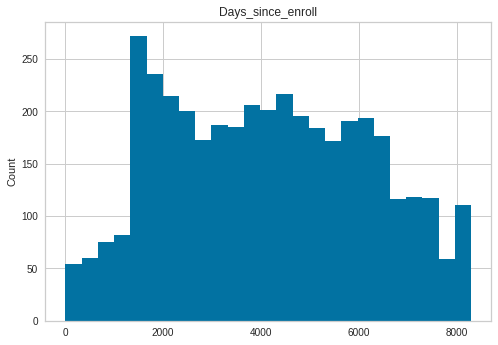

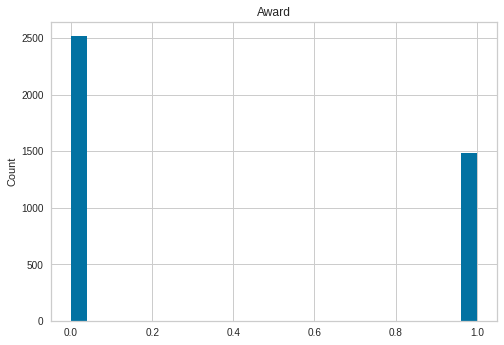

In [15]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


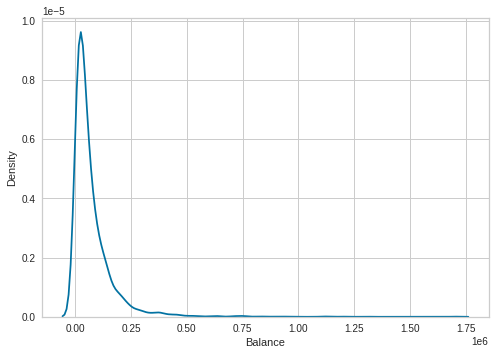

Qual_miles


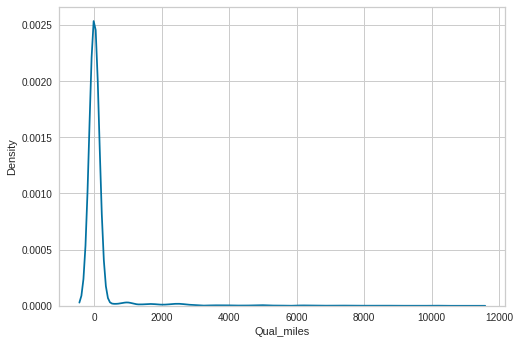

cc1_miles


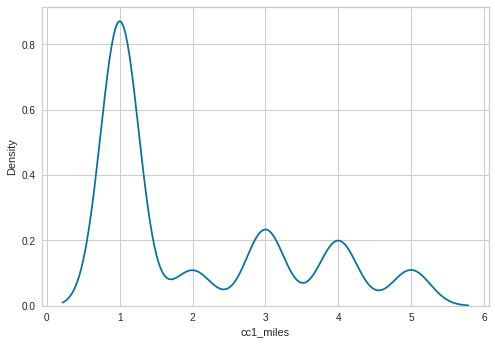

cc2_miles


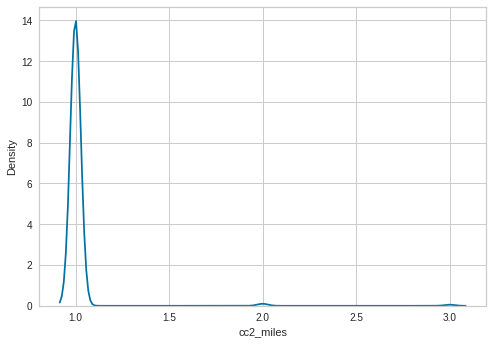

cc3_miles


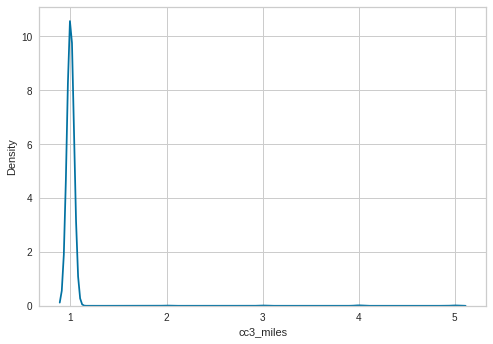

Bonus_miles


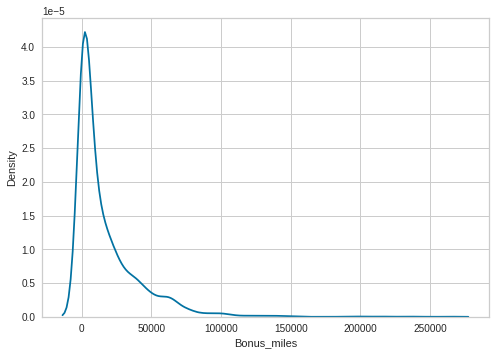

Bonus_trans


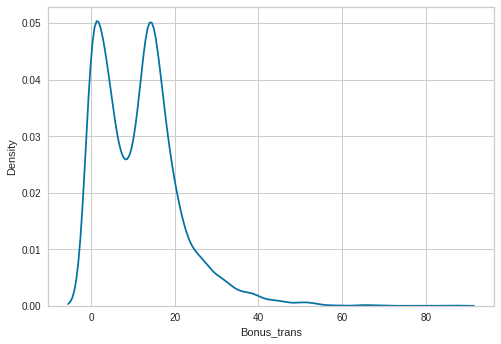

Flight_miles_12mo


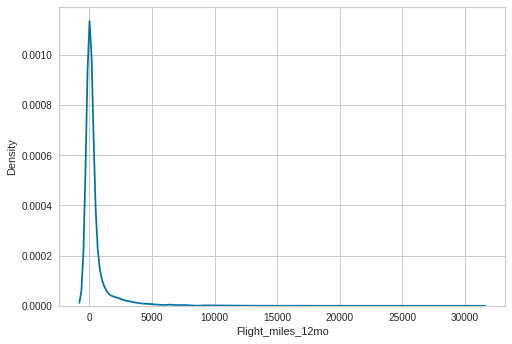

Flight_trans_12


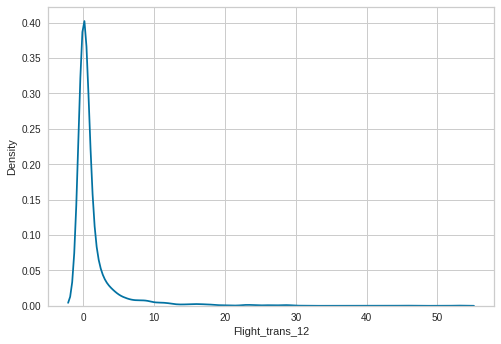

Days_since_enroll


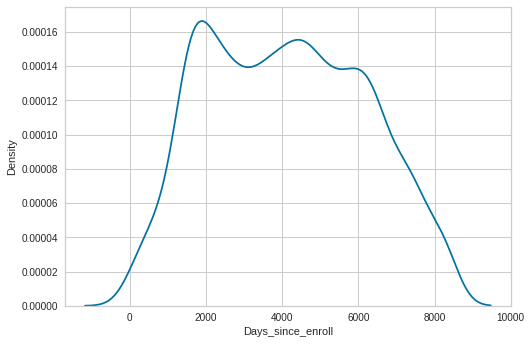

Award


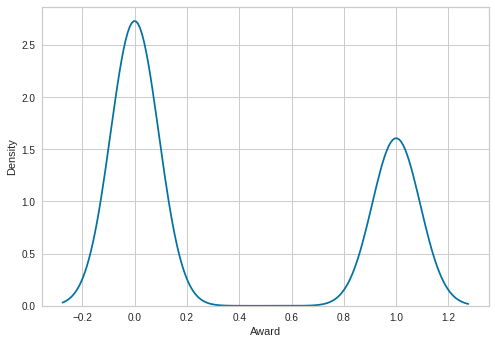

In [16]:
# Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [17]:
# Data visualization
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

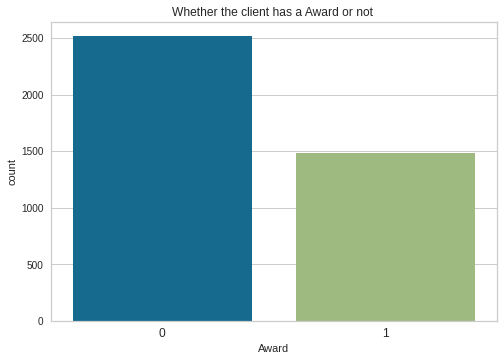

In [18]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

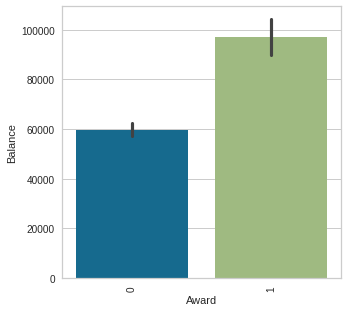

In [19]:
# Balance : Number of miles eligible for award travel
plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [20]:
# what is correlated with Balance?
corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403481
cc1_miles            0.338369
Bonus_trans          0.324928
Days_since_enroll    0.263232
Flight_trans_12      0.255720
Flight_miles_12mo    0.217568
Award                0.178540
Qual_miles           0.108731
cc3_miles            0.035246
cc2_miles           -0.008799
Name: Balance, dtype: float64

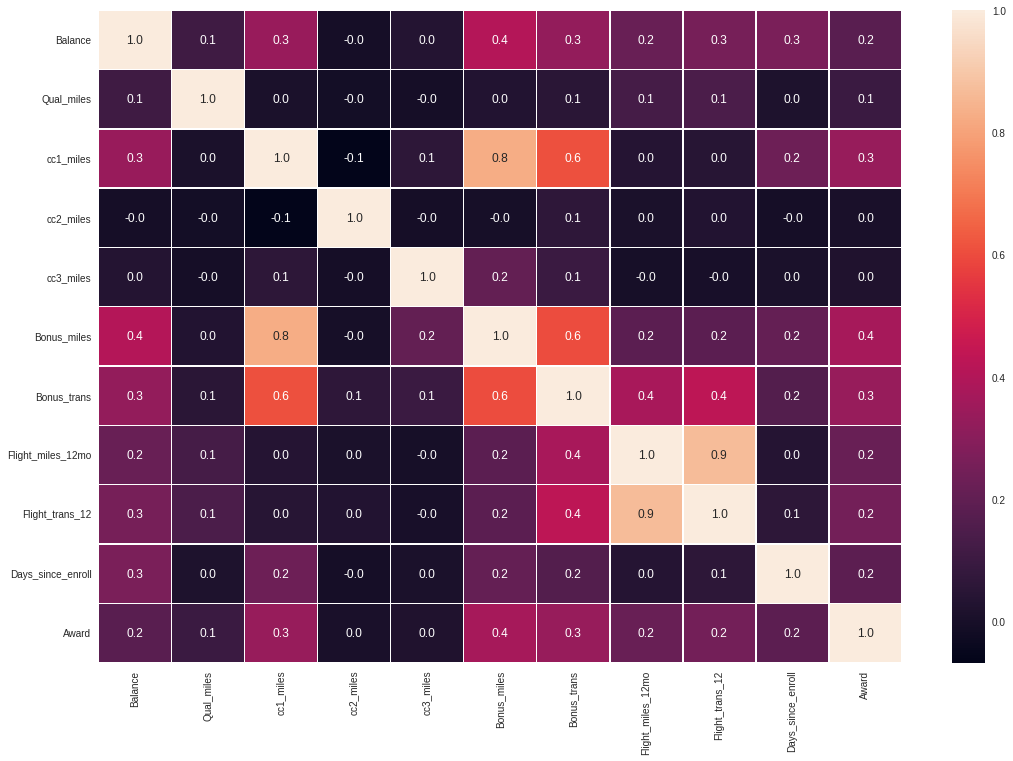

In [21]:
# correlation heatmap
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [27]:
#The following are positively correlated

#Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
#Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
#Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
#Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

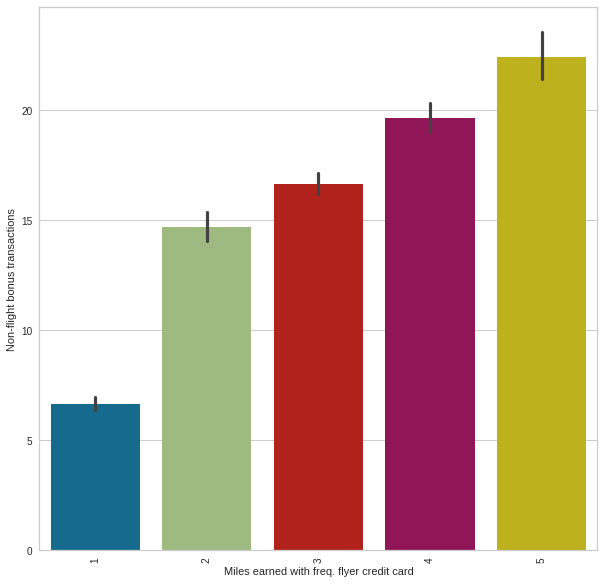

In [22]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

Data Preprocessing

In [23]:
#standardizing the data
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

In [24]:
# Normalizing the data
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

K-Means clustering

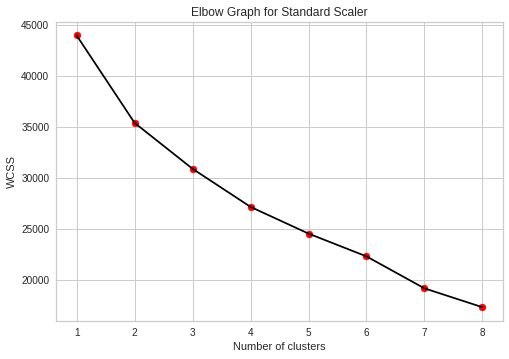

In [25]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score

 Silhouette Score

In [26]:
 from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


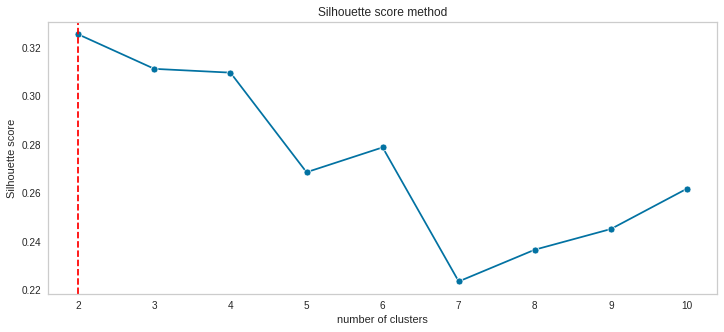

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


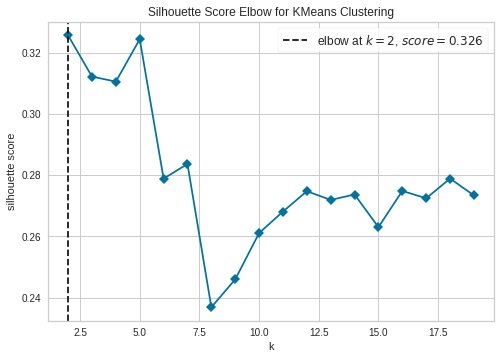

In [28]:
# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [29]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32560943823280414
For n_clusters = 3 The average silhouette_score is : 0.3123639744583387
For n_clusters = 4 The average silhouette_score is : 0.3105260534949983
For n_clusters = 5 The average silhouette_score is : 0.3186362799355969
For n_clusters = 6 The average silhouette_score is : 0.33390882549111023
For n_clusters = 7 The average silhouette_score is : 0.22122689868056106
For n_clusters = 8 The average silhouette_score is : 0.23751226772660572
For n_clusters = 9 The average silhouette_score is : 0.24595797444101478


In [ ]:
# According the the silhouette score of:

# The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

Build KMeans Cluster algorithm using K=6 

In [30]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [31]:
y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [32]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [33]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 1.13677261,  0.41416471,  0.1349185 , -0.09825429, -0.06277446,
         0.65651065,  1.70534897,  3.77057434,  4.00160023,  0.27124801,
         0.88372079],
       [ 0.43352169, -0.11059461,  1.20788336, -0.09825429, -0.05451336,
         0.92677866,  0.75142025, -0.08049933, -0.08944099,  0.37437246,
         0.58057336],
       [-0.29470712, -0.13006654, -0.60138992, -0.09825429, -0.06072242,
        -0.51695209, -0.49354988, -0.18652468, -0.19860853, -0.19996435,
        -0.35143215],
       [-0.04684161, -0.15626333, -0.66795719,  9.03710982, -0.06277446,
        -0.10149897,  0.61784116,  0.08745745,  0.22023229, -0.07277588,
         0.0515894 ],
       [ 0.63968392, -0.08446932,  1.02256319, -0.09825429, 15.64433492,
         3.17961273,  1.71447518,  0.0332068 ,  0.05959833,  0.23958062,
         0.33731815],
       [ 0.45709049,  6.73023291, -0.04288137, -0.09825429, -0.06277446,
         0.06387078,  0.06541283,  0.3595715 ,  0.39411338, -0.07153526,
         0.387

In [34]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

21082.506989130547

In [35]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [36]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,117220.645783,59.754217,3.715663,1.000000,1.001606,39424.177510,18.805622,347.219277,1.034538,4894.061044,0.649799
2,43782.888398,42.910076,1.229225,1.000000,1.000401,4635.898836,6.843436,198.821357,0.619831,3702.996788,0.200321
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [37]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1830.321685
1,2,823.262630
2,3,625.041306
3,4,436.577023
4,5,348.813400
5,6,315.190996
6,7,287.604784
7,8,263.008324
8,9,243.882114
9,10,226.065989


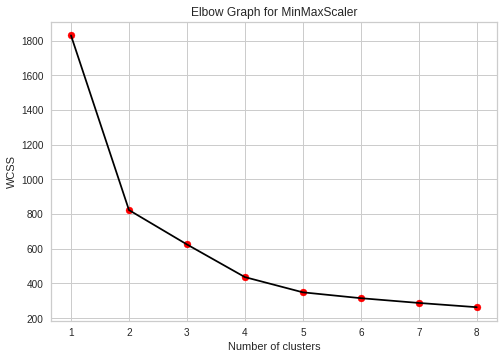

In [38]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


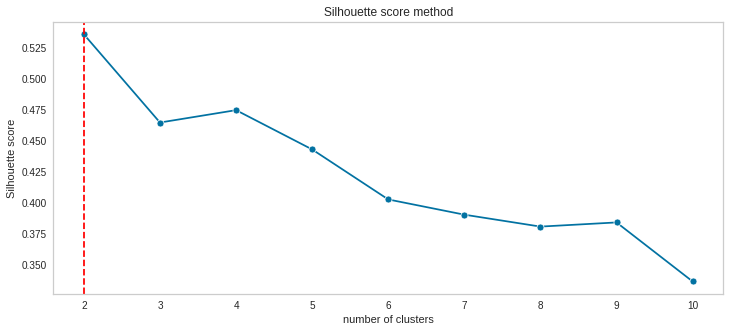

In [40]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


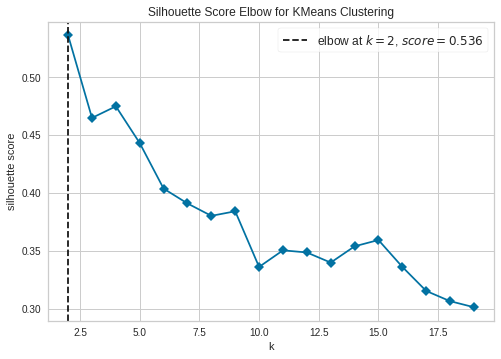

In [41]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [42]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.5360079468574656
For n_clusters = 3 The average silhouette_score is : 0.4648134718432359
For n_clusters = 4 The average silhouette_score is : 0.47447000144634316
For n_clusters = 5 The average silhouette_score is : 0.44308215892966824
For n_clusters = 6 The average silhouette_score is : 0.4035348207901808
For n_clusters = 7 The average silhouette_score is : 0.39031130918101453
For n_clusters = 8 The average silhouette_score is : 0.3809308224694427
For n_clusters = 9 The average silhouette_score is : 0.3845330798526648


Build KMeans Cluster algorithm using K=2 

In [43]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3998,)

In [44]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [45]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [46]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50740538e-02,  7.86125463e-03,  1.76102503e-01,
         6.95272149e-03,  2.18514104e-03,  3.87540081e-02,
         1.06291174e-01,  7.34601684e-03,  1.23162495e-02,
         4.60518630e-01, -6.99440506e-15]])

In [47]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

823.2626295763218

In [48]:
data['Kmeans_label'] = model_kmeans.labels_

In [50]:
# Group data by Clusters (K=2)
data.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,59795.579658,87.637267,1.704410,1.013905,1.008741,10218.850616,9.141041,226.382201,0.652761,3821.541518,0.0


Hierarchical Clustering Algorithm

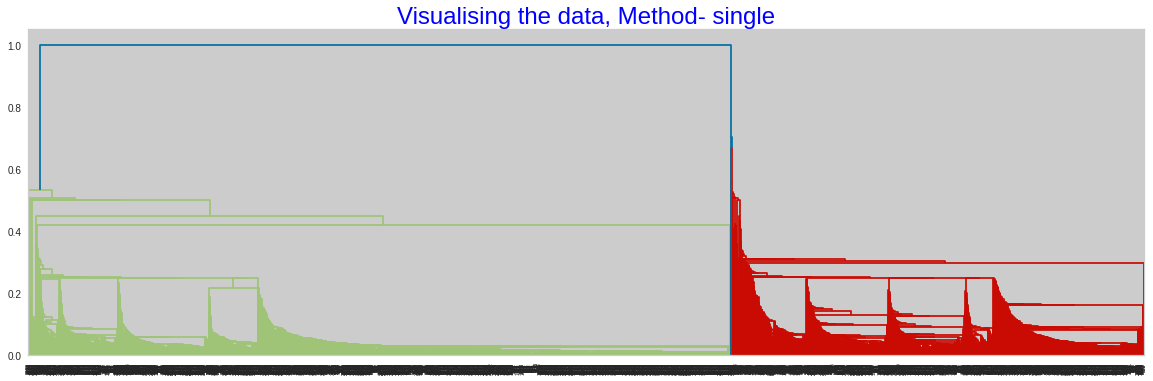

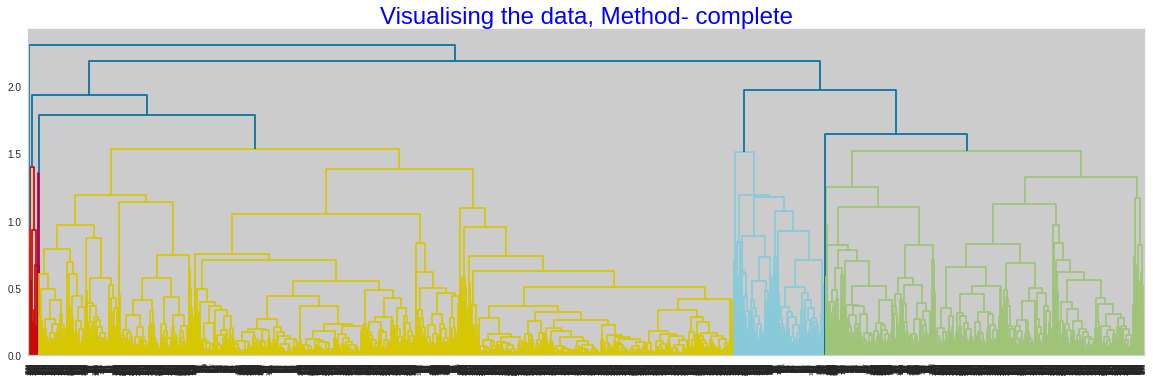

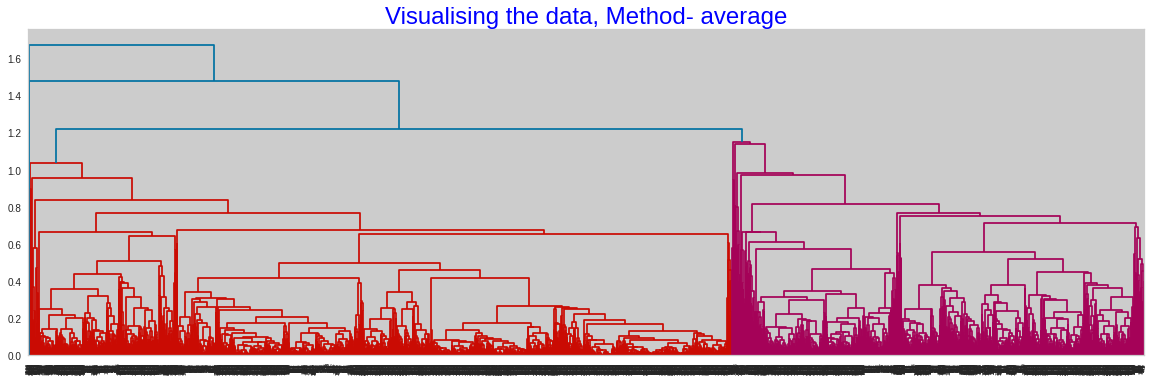

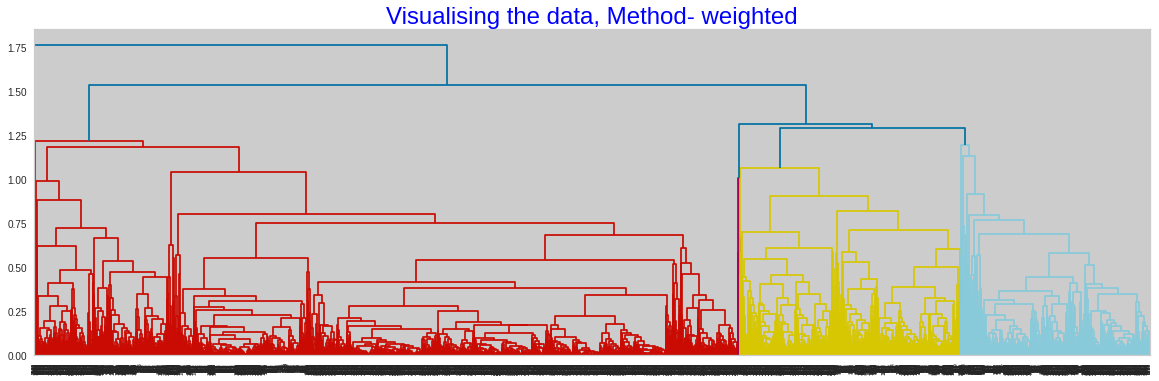

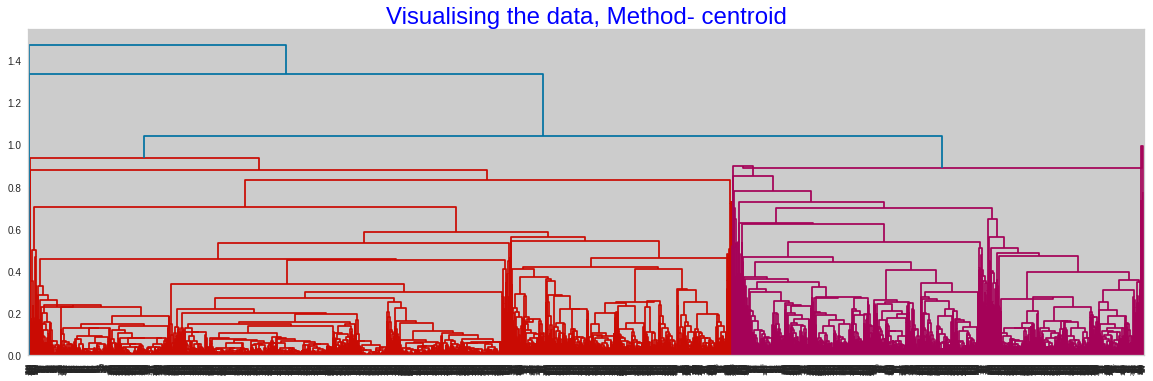

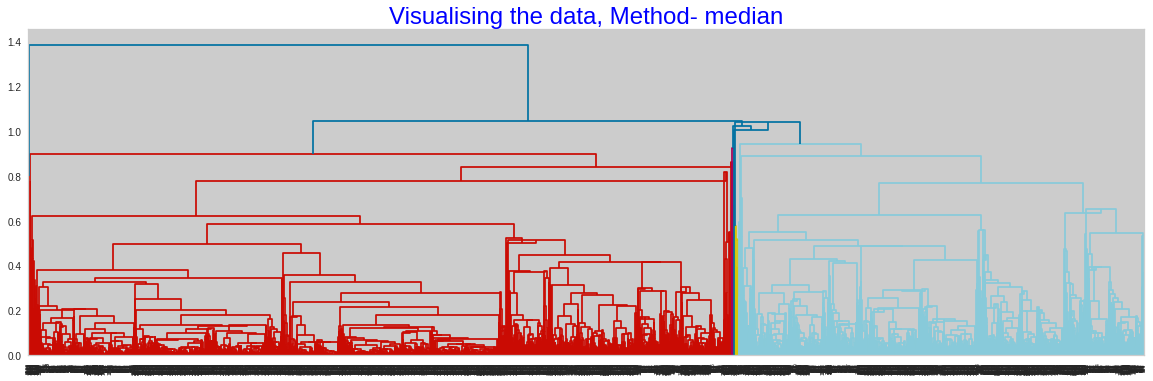

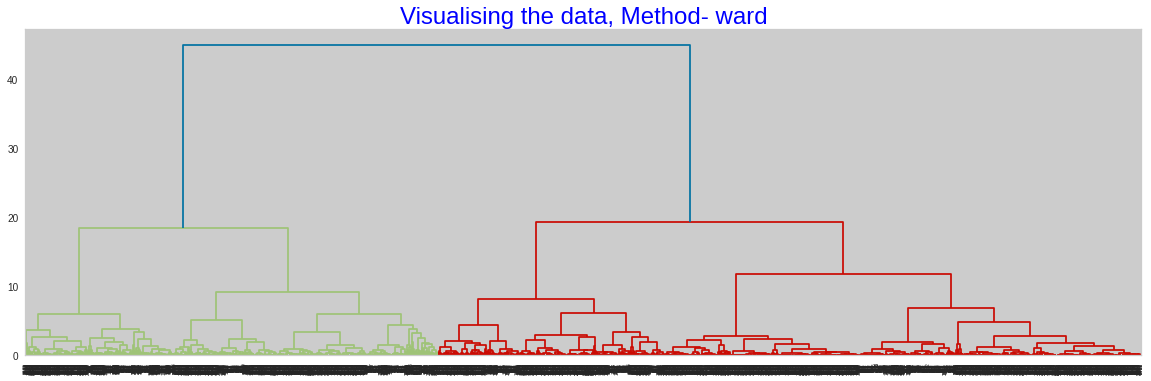

In [51]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [52]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5360079468574656
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4704169517699571
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4704169517699571
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5360079468574656

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354687185899775
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.531955179439626
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961907275736553
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5352380460661965

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42490723194969676
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4646631695604461
For n_clusters = 4 The average silhouette_score with linkage- average : 0.528679278106644
For n_

In [ ]:
#The seperation in Ward Method indicate that 2 is the optimal number for clusters.
#Ward method is actually a method that tries to minimize the variance within each cluster. 
#In K-means when we were trying to minimize the wcss to plot our elbow method chart, 
#here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. 
#That is the variance within each cluster.

In [53]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28940937913748194
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110927389025782
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110927389025782
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562659411309087

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.294175468146491
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760593104210354
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838415992513152
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350232754136659

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30828069696682436
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.598539307487652
For n_clusters = 4 The average silhouette_score with linkage- average : 0.773086976508639
For n_

In [ ]:
#Conclusion: Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.

In [54]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [55]:
y=pd.DataFrame(hclusters.fit_predict(data),columns=['clustersid'])
y['clustersid'].value_counts()

2    2811
3     823
4     204
1     134
0      26
Name: clustersid, dtype: int64

In [56]:
# Adding clusters to dataset
data['clustersid']=hclusters.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1,2
1,19244,0,1,1,1,215,2,0,0,6968,0,1,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,2
3,14776,0,1,1,1,500,1,0,0,6952,0,1,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3994,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3996,54899,0,1,1,1,500,1,500,1,1401,0,1,2


In [57]:
data.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,841016.769231,512.692308,3.346154,1.000000,1.115385,52888.269231,22.346154,1797.807692,6.653846,6447.269231,0.846154,0.153846
1,1,355242.694030,424.671642,3.059701,1.022388,1.000000,46811.955224,19.574627,1582.291045,4.835821,5654.537313,0.701493,0.298507
2,2,31391.909641,104.993597,1.765920,1.016009,1.009961,12219.287442,9.758805,299.227677,0.913554,3818.965137,0.339381,0.660619
3,3,114405.611179,172.149453,2.648846,1.012151,1.021871,24333.789793,14.736330,653.846902,1.866343,4588.586877,0.383961,0.616039
4,4,207713.774510,339.519608,2.897059,1.000000,1.000000,31895.799020,17.735294,988.960784,2.784314,5057.264706,0.465686,0.534314


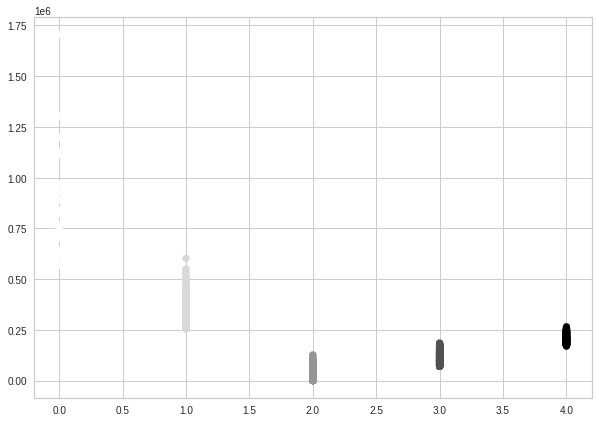

In [58]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clustersid'],data['Balance'], c=hclusters.labels_) 

DBSCAN

In [59]:
#DBSCAN on standard scaled data
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [60]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

Collecting number of generated clusters

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


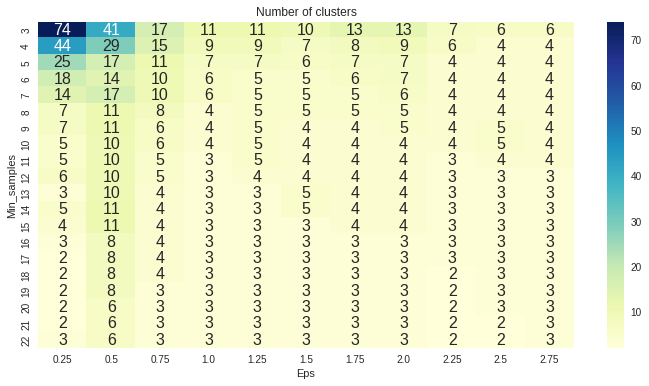

In [61]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

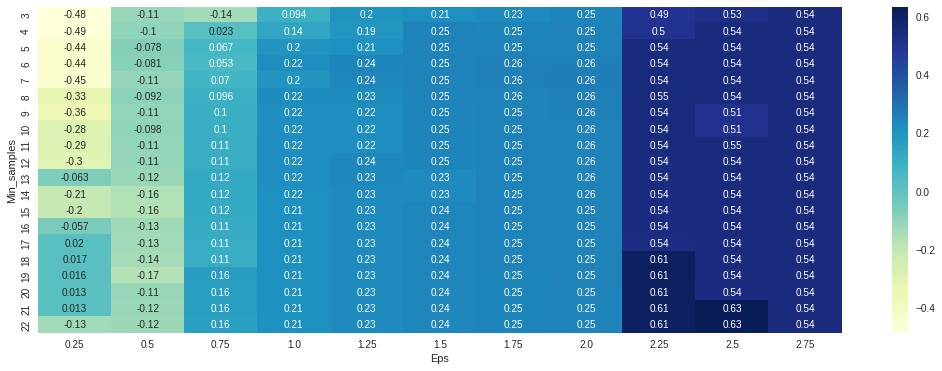

In [62]:
#As the heatplot above shows, the number of clusters vary from 74 to 2.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [63]:
#Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [64]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [65]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clustersid,DBSCAN_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,0


In [68]:
data.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clustersid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,0.312500,2.057692
0,66001.830607,68.500792,2.034301,1.000000,1.000000,15593.685752,10.879420,305.613193,0.925330,4083.553826,0.353034,0.646966,2.272559


In [69]:
#DBSCAN on minmax scaled data
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [70]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


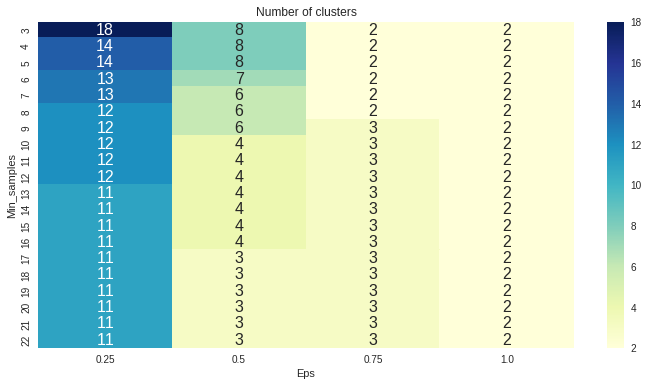

In [71]:
# collecting number of generated clusters
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()


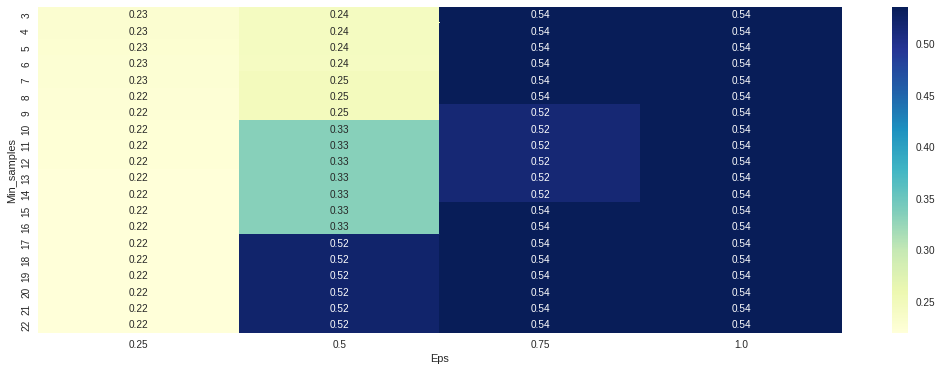

In [72]:
# as from the above heatplot,the number of clusters vary from 18 to 2
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()


In [73]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5360


In [74]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5360


Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [75]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [76]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [78]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clustersid,DBSCAN_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,1


In [80]:
data.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clustersid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
0,59795.579658,87.637267,1.704410,1.013905,1.008741,10218.850616,9.141041,226.382201,0.652761,3821.541518,0.0,1.0,2.268971
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.0,2.248481


In [82]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data.loc[data.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [83]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Balance,59795.579658,97053.051317
Qual_miles,87.637267,240.196489
cc1_miles,1.704410,2.661715
cc2_miles,1.013905,1.015530
cc3_miles,1.008741,1.018231
Bonus_miles,10218.850616,28905.414585
Bonus_trans,9.141041,15.782579
Flight_miles_12mo,226.382201,857.501013
Flight_trans_12,0.652761,2.599595
Days_since_enroll,3821.541518,4625.062120
